In [2]:
'''
OpenAI-Gym Cartpole-v0 LSTM experiment
Giuseppe Bonaccorso (http://www.bonaccorso.eu)
'''

import gym
import numpy as np
import time

from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras import backend as K

# Number of episodes
nb_episodes = 5000

# Max execution time (in seconds)
max_execution_time = 10

# Set random seed
np.random.seed(1000)


class CartPoleController(object):
    def __init__(self, n_input=4, n_hidden=10, n_output=1, initial_state=0.1, training_threshold=1.5):
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.initial_state = initial_state
        self.training_threshold = training_threshold
        self.step_threshold = 0.5

        # Action neural network
        # Dense input -> (1 x n_input)
        # LSTM -> (n_hidden)
        # Dense output -> (n_output)
        self.action_model = Sequential()

        self.action_model.add(LSTM(self.n_hidden, input_shape=(1, self.n_input)))
        self.action_model.add(Activation('tanh'))
        self.action_model.add(Dense(self.n_output))
        self.action_model.add(Activation('sigmoid'))

        self.action_model.compile(loss='mse', optimizer='adam')

    def action(self, obs, prev_obs=None, prev_action=None):
        x = np.ndarray(shape=(1, 1, self.n_input)).astype(K.floatx())

        if prev_obs is not None:
            prev_norm = np.linalg.norm(prev_obs)

            if prev_norm > self.training_threshold:
                # Compute a training step
                x[0, 0, :] = prev_obs

                if prev_norm < self.step_threshold:
                    y = np.array([prev_action]).astype(K.floatx())
                else:
                    y = np.array([np.abs(prev_action - 1)]).astype(K.floatx())

                self.action_model.train_on_batch(x, y)

        # Predict new value
        x[0, 0, :] = obs
        output = self.action_model.predict(x, batch_size=1)

        return self.step(output)

    def step(self, value):
        if value > self.step_threshold:
            return int(1)
        else:
            return int(0)

Using TensorFlow backend.


In [7]:
print('OpenAI-Gym CartPole-v0 LSTM experiment')
env = gym.make('CartPole-v0')
#env.render()
#   env.monitor.start(result_location, force=True)
cart_pole_controller = CartPoleController()

total_reward = []

for episode in range(nb_episodes):
    # Reset environment
    observation = env.reset()
    previous_observation = observation
    
    action = cart_pole_controller.action(observation)
    previous_action = action

    done = False
    t = 0
    partial_reward = 0.0
    start_time = time.time()
    elapsed_time = 0

    while not done and elapsed_time < max_execution_time:
        t += 1
        elapsed_time = time.time() - start_time

        env.render()
        observation, reward, done, info = env.step(action)
        partial_reward += reward

        action = cart_pole_controller.action(observation, previous_observation, previous_action)
        previous_observation = observation
        previous_action = action


    print('Episode %d finished after %d timesteps. Total reward: %1.0f. Elapsed time: %d s' %
          (episode+1, t+1, partial_reward, elapsed_time))

    total_reward.append(partial_reward)

env.close()
total_reward = np.array(total_reward)
print('Average reward: %3.2f' % np.mean(total_reward))

OpenAI-Gym CartPole-v0 LSTM experiment
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Episode 1 finished after 40 timesteps. Total reward: 39. Elapsed time: 0 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Episode 2 finished after 41 timesteps. Total reward: 40. Elapsed time: 0 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Episode 3 finished after 27 timesteps. Total reward: 26. Elapsed time: 0 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

W0903 16:12:08.807473 140227130177344 deprecation.py:323] From /home/demir/anaconda3/envs/temp/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0903 16:12:09.440636 140227130177344 deprecation.py:506] From /home/demir/.local/lib/python3.6/site-packages/Keras-2.0.2-py3.6.egg/keras/backend/tensorflow_backend.py:519: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


False
False
False
False
False
False
False
False
False
False
True
Episode 4 finished after 58 timesteps. Total reward: 57. Elapsed time: 2 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Episode 5 finished after 66 timesteps. Total reward: 65. Elapsed time: 1 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Episode 6 finished after 32 timesteps. Total reward: 31. Elapsed time: 0 s
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt

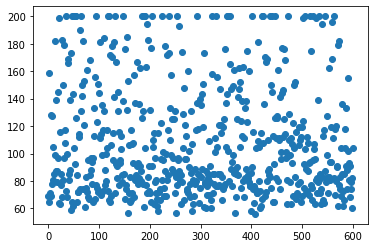

In [5]:
plt.scatter(list(range(len(total_reward))),total_reward)

In [ ]:
total_reward.shape

In [6]:
env.close()